# Pandas 学习笔记

* 版本号： 0.4
* 创建时间： 2015年02月07日 星期六 10:26:33 CST
* 修改时间： 2023年05月27日
* 数据来源：
 * movies.csv http://boxofficemojo.com/daily/
 * iris.csv https://github.com/dsaber/py-viz-blog
 * titanic.csv https://github.com/dsaber/py-viz-blog
 * ts.csv https://github.com/dsaber/py-viz-blog

## 一些准备工作

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame
from pathlib import Path

# 辅助函数

def get_titanic_df():
    return pd.read_csv('datas/titanic.csv')

def get_iris_df():
    return pd.read_csv('datas/iris.csv')

def get_tips_df():
    return pd.read_csv('datas/tips.csv')

def get_random_df():
    return pd.DataFrame(
        np.random.randn(6, 4),
        index=pd.date_range('20200101', periods=6),
        columns=list('ABCD'))

## 安装使用
2020年1月更新:

* jupyter 已经进化出 `jupyter-lab` 了。

2018年更新:

ipython notebook 已更名为 jupyter notebook 。安装使用方法如下：

* 安装 anaconda ，anaconda 是一个 Python 发行版。装好后就已经包含 `pandas` 和 `jupyter notebook` 。
* 运行 `jupyter notebook` 命令就可以使用 jupyter notebook 。
* 要在 notebook 即时显示图表，可以使用在 notebook 中使用 `%matplotlib inline` 命令。

下面是以前的安装使用方法：

* 安装 pandas
```shell
sudo apt-get install build-essential python-dev
sudo apt-get install python-pandas python-tk
sudo apt-get install python-scipy python-matplotlib python-tables
sudo apt-get install python-numexpr python-xlrd python-statsmodels
sudo apt-get install python-openpyxl python-xlwt python-bs4
```    
if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

* 安装 ipython-notebook
```shell
sudo pip install "ipython[notebook]"
sudo pip install pygments
```
* 使用``ipython notebook``运行 ipython-notebook 。如果使用matplotlib内嵌进网页中,那么需要运行:`ipython notebook --matplotlib inline` ；或者在已经打开的 notebook 中运行 `%matplotlib inline` 命令。

In [149]:
# 查看 pandas 的版本
# pd.__version__
# 查看当前环境涉及软件的版本
# pd.show_versions()

## DataFrame 速览

### 创建

In [150]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)
frame

,fruit,year,price
0,Apple,2017,20.50
1,Apple,2018,21.30
2,Apple,2019,25.00
3,Grape,2017,10.10
4,Grape,2018,10.90
5,Grape,2019,9.98


生成时指定 columns 和 index ，index 的长度要与行数相匹配

In [151]:
frame2 = DataFrame(
    data,
    columns = ['year', 'month', 'fruit', 'price'],
    index = ['one', 'two', 'three', 'four', 'five', 'six']
)
frame2

,year,month,fruit,price
one,2017,NaN,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,NaN,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,NaN,Grape,10.90
six,2019,NaN,Grape,9.98


### 查看数据

通过类似字典标记的方式或属性的方式,可以将 `DataFrame` 的列获取为一个 `Series` 。
IPython 提供了类似属性的访问(即frame2.year)和tab补全。
frame2[column] 适用于任何列的名,但是 frame2.column 只有在列名是一个合理
的 Python 变量名时才适用。
注意,返回的 Series 拥有原 DataFrame 相同的索引,且其 name 属性也已经被相应地
设置好了。

In [152]:
frame2['fruit']

one      Apple
two      Apple
three    Apple
four     Grape
five     Grape
six      Grape
Name: fruit, dtype: object

In [153]:
frame2.year

one      2017
two      2018
three    2019
four     2017
five     2018
six      2019
Name: year, dtype: int64

In [154]:
frame2.loc['two']

year      2018
month      NaN
fruit    Apple
price     21.3
Name: two, dtype: object

### 修改数据

In [155]:
frame2.month = 11
frame2

,year,month,fruit,price
one,2017,11,Apple,20.50
two,2018,11,Apple,21.30
three,2019,11,Apple,25.00
four,2017,11,Grape,10.10
five,2018,11,Grape,10.90
six,2019,11,Grape,9.98


In [156]:
frame2.month = np.arange(6)
frame2

,year,month,fruit,price
one,2017,0,Apple,20.50
two,2018,1,Apple,21.30
three,2019,2,Apple,25.00
four,2017,3,Grape,10.10
five,2018,4,Grape,10.90
six,2019,5,Grape,9.98


DataFrame 的切片是 DataFrame 的视图，不是副本。对切片赋值会改变 DataFrame
本身。

In [157]:
c_month = frame2['month']
c_month

one      0
two      1
three    2
four     3
five     4
six      5
Name: month, dtype: int64

In [158]:
month = Series([1,3,5], index=['one', 'three', 'five'])
frame2['month'] = month
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


In [159]:
# c_month['two'] = 2.2 
# 这种方式也能改写值，但是因为性能的问题不推荐使用，详见：
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
frame2.loc['two', 'month'] = 2.2
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,2.2,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


### 删除数据

In [160]:
del frame2['month'] #  删除 column
frame2

,year,fruit,price
one,2017,Apple,20.50
two,2018,Apple,21.30
three,2019,Apple,25.00
four,2017,Grape,10.10
five,2018,Grape,10.90
six,2019,Grape,9.98


## pandas 的索引对象

In [161]:
nums = Series(range(3), index=['one', 'two', 'three'])

In [162]:
num_index = nums.index

In [163]:
num_index

Index(['one', 'two', 'three'], dtype='object')

In [164]:
num_index[1:]

Index(['two', 'three'], dtype='object')

索引对象是不可变的，不能对其赋值

In [165]:
num_index2 = pd.Index(['one', 'two', 'three'])

In [166]:
num_index is num_index2

False

In [167]:
num_index == num_index2

array([ True,  True,  True])

In [168]:
nums2= Series(range(3), index = num_index2)

In [169]:
nums2

one      0
two      1
three    2
dtype: int64

In [170]:
nums2.index is num_index2

True

In [171]:
nums2.index == num_index2

array([ True,  True,  True])

In [172]:
frame3 = get_random_df()

In [173]:
frame3.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [174]:
frame3.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### reindex

#### Series reindex

In [175]:
obj = Series(range(4), index=['a', 'c', 'd', 'b'])
obj

a    0
c    1
d    2
b    3
dtype: int64

In [176]:
obj2 = obj.reindex(['a', 'b', 'c', 'd'])

In [177]:
obj2

a    0
b    3
c    1
d    2
dtype: int64

#### 自动填充

In [178]:
obj3 = Series(['red', 'blue', 'yellow'], index=[1,3,5])

In [179]:
obj3

1       red
3      blue
5    yellow
dtype: object

In [180]:
obj3.reindex(range(6), method='ffill')

0       NaN
1       red
2       red
3      blue
4      blue
5    yellow
dtype: object

#### Frame reindex

In [181]:
range(5)

range(0, 5)

In [182]:
df = pd.DataFrame(
        np.random.randn(6, 4),
        index=range(6),
        columns=list('ABCD'))
df

,A,B,C,D
0,-0.465042,0.741115,-0.217720,-0.134422
1,1.263567,-0.160621,-0.293899,-0.629226
2,0.186729,1.464126,0.431234,1.461413
3,-1.321927,-0.573289,-0.050649,0.531475
4,-0.088944,-0.583947,0.330705,-0.432653
5,-1.867718,0.872645,-0.171649,2.910491


In [183]:
df.reindex(range(5,-1,-1), columns=['A', 'C', 'DDD'])

,A,C,DDD
5,-1.867718,-0.171649,NaN
4,-0.088944,0.330705,NaN
3,-1.321927,-0.050649,NaN
2,0.186729,0.431234,NaN
1,1.263567,-0.293899,NaN
0,-0.465042,-0.217720,NaN


#### drop

In [184]:
df.drop('D', axis='columns') #  不修改对象

,A,B,C
0,-0.465042,0.741115,-0.217720
1,1.263567,-0.160621,-0.293899
2,0.186729,1.464126,0.431234
3,-1.321927,-0.573289,-0.050649
4,-0.088944,-0.583947,0.330705
5,-1.867718,0.872645,-0.171649


In [185]:
df

,A,B,C,D
0,-0.465042,0.741115,-0.217720,-0.134422
1,1.263567,-0.160621,-0.293899,-0.629226
2,0.186729,1.464126,0.431234,1.461413
3,-1.321927,-0.573289,-0.050649,0.531475
4,-0.088944,-0.583947,0.330705,-0.432653
5,-1.867718,0.872645,-0.171649,2.910491


In [186]:
df.drop('D', axis='columns', inplace=True) #  修改对象

In [187]:
df

,A,B,C
0,-0.465042,0.741115,-0.217720
1,1.263567,-0.160621,-0.293899
2,0.186729,1.464126,0.431234
3,-1.321927,-0.573289,-0.050649
4,-0.088944,-0.583947,0.330705
5,-1.867718,0.872645,-0.171649


## DataFrames 创建

In [188]:
dates = pd.date_range('20180101', periods=6);dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [189]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'));df

,A,B,C,D
2018-01-01,-0.273488,-1.294313,-0.023636,-0.197986
2018-01-02,-0.627156,-1.091186,-0.076325,-2.065470
2018-01-03,-0.874149,-0.018741,-0.456528,0.678688
2018-01-04,-0.752213,1.102387,1.536180,-0.715299
2018-01-05,0.114746,-3.258142,0.635055,-0.220527
2018-01-06,2.204070,-1.364154,0.501800,-0.115078


In [190]:
# 可以使用字典来创建 DataFrame 。
# 如果字典的 Value 是单一值，那么会自动扩展。
# 如果字典的 Value 是列表或者 Series ，那么长度要保持一致。
# 如果字典中只有一个值有 Index ，那么会使用这个 Index 作为整个 DataFrame 的 Index 。
# 如果字典有多个 Index ，那么必须保持一致，否则会报错。
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(2,6)),dtype='float32'), 
      'D' : np.array([3] * 4,dtype='int32'), 
      'E' : pd.Categorical(["test","train","test","train"]), 
      'F' : 'foo' }
)
df2

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,test,foo
5,1.0,2013-01-02,1.0,3,train,foo


In [191]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)

## DataFrame 全局操作

In [192]:
df = get_random_df()

In [193]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [194]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [195]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [196]:
df.values

array([[ 0.47955266, -0.35354423, -0.43006241,  1.5374956 ],
       [ 0.81524798, -0.45112507,  0.68075475, -0.12313463],
       [ 0.65728867, -0.91466987,  1.16559761,  2.25275866],
       [-0.84239775,  0.78586585,  0.66499886,  1.28286014],
       [-1.84732783,  0.76519896,  0.48403202,  0.1313728 ],
       [ 0.51712929, -0.87857544,  0.94075225,  1.38218062]])

In [197]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.036751,-0.174475,0.584346,1.077256
std,1.068476,0.769089,0.551319,0.901611
min,-1.847328,-0.914670,-0.430062,-0.123135
25%,-0.511910,-0.771713,0.529274,0.419245
50%,0.498341,-0.402335,0.672877,1.332520
75%,0.622249,0.485513,0.875753,1.498667
max,0.815248,0.785866,1.165598,2.252759


In [198]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,0.479553,0.815248,0.657289,-0.842398,-1.847328,0.517129
B,-0.353544,-0.451125,-0.914670,0.785866,0.765199,-0.878575
C,-0.430062,0.680755,1.165598,0.664999,0.484032,0.940752
D,1.537496,-0.123135,2.252759,1.282860,0.131373,1.382181


## 读入数据

### 从  CSV 文件读入数据

In [199]:
# 读入 CSV 格式数据
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [200]:
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 读取目录下所有CSV，合并为1个DataFrame，去重

In [201]:
source_path = Path('./datas')
csv_files = source_path.glob('*.csv')
dfs = [pd.read_csv(item, encoding='utf8', dtype="string") for item in csv_files]
df = pd.concat(dfs).drop_duplicates()
#df.head(3)

### 从数据库读入数据
参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

### 从 Excel 文件读入数据

#### 原型

```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0,
                  index_col=None, names=None, usecols=None, parse_dates=False,
                  date_parser=None, na_values=None, thousands=None,
                  convert_float=True, converters=None, dtype=None,
                  true_values=None, false_values=None, engine=None,
                  squeeze=False, **kwds)
```
Read an Excel table into a pandas DataFrame

示例：
```python
# 读入 Excel 文件，所有字段都是 str
df = pd.read_excel(source_file, dtype="string")
```

## 复制数据

In [202]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


## 选择数据

1. 行，列 --> df[]
1. 区域 --> df.loc[], df.iloc[], df.ix[]
1. 单元格 --> df.at[], df.iat[]

### 选择单个数据

In [203]:
df.at[1, 'Date']

'Jan. 31'

In [204]:
df.iat[1,1]

'Jan. 31'

### 选择某个区域

In [205]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,Row,Date,Day,Day#
1,2,Jan. 31,Sat,31
3,4,Feb. 2,Mon,33
5,6,Feb. 4,Wed,35


In [206]:
df.loc[[1,3,5],['Date', 'Gross']]

,Date,Gross
1,Jan. 31,16510536
3,Feb. 2,2645109
5,Feb. 4,2273342


### 选择行

In [207]:
df = get_titanic_df()
df = df[['survived', 'age', 'deck', 'class']]
df[1:4] # 第2-4行

,survived,age,deck,class
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First


In [208]:
# 查看头部数据
df.head()

,survived,age,deck,class
0,0,22.0,NaN,Third
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First
4,0,35.0,NaN,Third


In [209]:
# 查看尾部数据
df.tail(2)
#head 和 tail 接受一个整数参数，缺省值为 5 。

,survived,age,deck,class
889,1,26.0,C,First
890,0,32.0,NaN,Third


In [210]:
# 选择 deck 为空值的行
df[df['deck'].isnull()].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
2,1,26.0,NaN,Third
4,0,35.0,NaN,Third
5,0,NaN,NaN,Third
7,0,2.0,NaN,Third


In [211]:
df[df.deck.isna()].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
2,1,26.0,NaN,Third
4,0,35.0,NaN,Third
5,0,NaN,NaN,Third
7,0,2.0,NaN,Third


In [212]:
# 选择 deck 为非空值的行
df[df.deck.notnull()].head()

,survived,age,deck,class
1,1,38.0,C,First
3,1,35.0,C,First
6,0,54.0,E,First
10,1,4.0,G,Third
11,1,58.0,C,First


In [213]:
# 根据条件过滤
df[(df['class'] == 'First') | (df.deck == 'E') ].head()

,survived,age,deck,class
1,1,38.0,C,First
3,1,35.0,C,First
6,0,54.0,E,First
11,1,58.0,C,First
23,1,28.0,A,First


In [214]:
df[ (df['class'] == 'First') & (df.deck == 'D') & (df.age < 30)].head()

,survived,age,deck,class
97,1,23.0,D,First
102,0,21.0,D,First
136,1,19.0,D,First
393,1,23.0,D,First
627,1,21.0,D,First


### 选择列

In [215]:
df = get_titanic_df()
df[['survived', 'age', 'deck', 'class']].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First
4,0,35.0,NaN,Third


In [216]:
df.iloc[:,[1, 2, 6]].head()

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [217]:
# 只包含指定字符的列
df.filter(regex='s', axis=1).head()

,survived,pclass,sex,sibsp,class
0,0,3,male,1,Third
1,1,1,female,1,First
2,1,3,female,0,Third
3,1,1,female,1,First
4,0,3,male,0,Third


In [218]:
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no


## 操作单元

### 单个单元赋值

In [219]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,2.346995,1.116287,0.401294,0.926658
2020-01-02,-0.808752,0.459212,-0.676031,-0.854257
2020-01-03,0.572446,-0.413316,0.462998,-0.062422
2020-01-04,-0.364533,1.383203,1.318582,1.647778
2020-01-05,-0.531459,-0.386292,-0.165824,-0.275442
2020-01-06,1.499051,0.821514,1.120324,-0.026031


In [220]:
# 单元格赋值
# 单个单元格赋值
df.iloc[0, 3] = 0.131211
df.loc['2020-01-02', 'B']= -0.131211
df.head(3)

,A,B,C,D
2020-01-01,2.346995,1.116287,0.401294,0.131211
2020-01-02,-0.808752,-0.131211,-0.676031,-0.854257
2020-01-03,0.572446,-0.413316,0.462998,-0.062422


### 多个单元格赋值

In [221]:
df.loc[df.index[0:2], 'C'] = [100, 200]
df.head(3)

,A,B,C,D
2020-01-01,2.346995,1.116287,100.000000,0.131211
2020-01-02,-0.808752,-0.131211,200.000000,-0.854257
2020-01-03,0.572446,-0.413316,0.462998,-0.062422


## 操作列

### 调整列的顺序

In [222]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一

In [223]:
col_order = ['c', 'a', 'b', 'd']
df = df[col_order]
df

,c,a,b,d
0,5,1,3,7
1,6,2,4,8


#### 方法二

In [224]:
new_df = df.drop('c', axis=1)
new_df.insert(2, 'c', df['c'])
new_df

,a,b,c,d
0,1,3,5,7
1,2,4,6,8


### 修改一个列头

In [225]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [226]:
df.rename(columns={'a':'AA'}, inplace=True);df

,AA,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


### 修改全部列头

转自：https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Pandas 0.21+ Answer

There have been some significant updates to column renaming in version 0.21.

The rename method has added the axis parameter which may be set to columns or 1. This update makes this method match the rest of the pandas API. It still has the index and columns parameters but you are no longer forced to use them.

The set_axis method with the inplace set to False enables you to rename all the index or column labels with a list.

Examples for Pandas 0.21+

In [227]:
# 构建 DataFrame
df = pd.DataFrame({'$a':[1,2], '$b': [3,4], 
                   '$c':[5,6], '$d':[7,8], 
                   '$e':[9,10]})
df

,$a,$b,$c,$d,$e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一：使用 rename ，，并且设置 axis='columns' 或者 axis=1

In [228]:
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [229]:
# 下句与上句结果相同
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [230]:
# 老的方法，结果相同
df.rename(columns={'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'})

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [231]:
#rename 函数接受一个函数作为参数，作为参数的函数作用于每一个列名称。
df.rename(lambda x: x[1:], axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [232]:
df.rename(lambda x: x[1:], axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法二：使用 set_axis ，把一个 list 作为列名称，并且设置 inplace=False
list 的长度必须与列（或者索引）的数量一致。当前版本（0.24.2， inplace 参数的默认值为 True ，以后可能改为 False 。

In [233]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=False)

/tmp/ipykernel_208239/2513360164.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=False)


,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [234]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis=1, inplace=False)

/tmp/ipykernel_208239/1854424914.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['a', 'b', 'c', 'd', 'e'], axis=1, inplace=False)


,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法三：使用 columns 属性

In [235]:
df.columns = ['a', 'b', 'c', 'd', 'e']
df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


Why not use df.columns = ['a', 'b', 'c', 'd', 'e']?

There is nothing wrong with assigning columns directly like this. It is a perfectly good solution.

The advantage of using set_axis is that it can be used as part of a method chain and that it returns a new copy of the DataFrame.
Without it, you would have to store your intermediate steps of the chain to another variable before reassigning the columns.
```
# new for pandas 0.21+
df.some_method1()
  .some_method2()
  .set_axis()
  .some_method3()

# old way
df1 = df.some_method1()
        .some_method2()
df1.columns = columns
df1.some_method3()
```

### 打印列类型

In [236]:
df = df_movies.copy()
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Row', 'Day#', 'Top 10 Gross', 'Gross'], object: ['Date', 'Day', '#1 Movie']}

In [237]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print(key,':\t', ','.join(value))

int64 :	 Row,Day#,Top 10 Gross,Gross
object :	 Date,Day,#1 Movie


### 插入列

In [238]:
df = df_movies.copy()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,memo
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,


In [239]:
# 方式二：在中间插入
df = df_movies.copy()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,Row,year,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,2015,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,2015,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [240]:
# 根据现有值生成一个新的列
df = df_movies.copy()
df.insert(loc = 5 , column=u'OtherGross', value=df[u'Top 10 Gross'] - df[u'Gross'])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,OtherGross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,16262735,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,25123052,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,8271203,American Sniper,4244376


In [241]:
# 根据现有值生成多个新的列
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


In [242]:
# 根据现有值生成多个新的列
df = df_movies.copy()
df.head()

def process_date_col(se):
    #根据日期生成月份和日两个新的列
    if pd.isnull(se['Date']):
        se['month'] = se['day'] = np.nan
    else:
        se['month'], se['day'] = se['Date'].split('.')
    return se
df['month'] = df['day'] = np.nan
df_new = df.apply(process_date_col, axis=1)
df_new.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [243]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,-1.274079,-1.406294,-0.175176,-0.266301
2020-01-02,-0.258805,0.408561,-0.665168,-0.542355
2020-01-03,-1.645218,-0.622368,-0.292393,-0.321825
2020-01-04,0.680113,-0.240049,0.456046,-0.478131
2020-01-05,0.606808,-0.517625,-0.888554,0.394579
2020-01-06,1.527187,-1.095229,-0.149951,-0.619459


#### 根据一列的值改变本列的值

In [244]:
# 方法一
# 把 C 列小于 0 的数据设置为 0 
df.loc[df.C < 0, 'C'] = 0
df

,A,B,C,D
2020-01-01,-1.274079,-1.406294,0.000000,-0.266301
2020-01-02,-0.258805,0.408561,0.000000,-0.542355
2020-01-03,-1.645218,-0.622368,0.000000,-0.321825
2020-01-04,0.680113,-0.240049,0.456046,-0.478131
2020-01-05,0.606808,-0.517625,0.000000,0.394579
2020-01-06,1.527187,-1.095229,0.000000,-0.619459


In [245]:
# 根据一列的值改变本列的值
# 方法二
# 把 C 列小于 0 的数据设置为 0 
df['D'] = df['D'].apply(lambda x : 0 if x<0 else x)
df

,A,B,C,D
2020-01-01,-1.274079,-1.406294,0.000000,0.000000
2020-01-02,-0.258805,0.408561,0.000000,0.000000
2020-01-03,-1.645218,-0.622368,0.000000,0.000000
2020-01-04,0.680113,-0.240049,0.456046,0.000000
2020-01-05,0.606808,-0.517625,0.000000,0.394579
2020-01-06,1.527187,-1.095229,0.000000,0.000000


#### 同时改变多个列的值

In [246]:
# 把 A B 两列数据均乘以 100
cols = ['A', 'B']
df[cols] = df[cols].applymap(lambda x: x*100)
df

,A,B,C,D
2020-01-01,-127.407950,-140.629373,0.000000,0.000000
2020-01-02,-25.880546,40.856133,0.000000,0.000000
2020-01-03,-164.521824,-62.236755,0.000000,0.000000
2020-01-04,68.011313,-24.004862,0.456046,0.000000
2020-01-05,60.680832,-51.762503,0.000000,0.394579
2020-01-06,152.718666,-109.522891,0.000000,0.000000


#### 按条件过滤行，批量修改字段

In [247]:
# A、B 列均小于零的，C 列改为空值
mask = (df['A'] < 0) & (df['B'] < 0)
df.loc[mask, 'C'] = np.nan
df

,A,B,C,D
2020-01-01,-127.407950,-140.629373,NaN,0.000000
2020-01-02,-25.880546,40.856133,0.000000,0.000000
2020-01-03,-164.521824,-62.236755,NaN,0.000000
2020-01-04,68.011313,-24.004862,0.456046,0.000000
2020-01-05,60.680832,-51.762503,0.000000,0.394579
2020-01-06,152.718666,-109.522891,0.000000,0.000000


#### 使用字典生成新的列

In [248]:
dict_str = """320281 江阴
320282 宜兴
320213 梁溪"""
# 生成一个字典，key是行政区划代码，value是行政区划名称
dict_rows = [row.split() for row in dict_str.split('\n')]
xzqh_dm_mc = dict([(item[0], item[1]) for item in dict_rows])
xzqh_dm_mc
df['行政区划代码'] = ['320281', '320282', '320283',
                '320281', '320282', '320213']

df['行政区划'] = df['行政区划代码'].map(xzqh_dm_mc)
df

,A,B,C,D,行政区划代码,行政区划
2020-01-01,-127.407950,-140.629373,NaN,0.000000,320281,江阴
2020-01-02,-25.880546,40.856133,0.000000,0.000000,320282,宜兴
2020-01-03,-164.521824,-62.236755,NaN,0.000000,320283,NaN
2020-01-04,68.011313,-24.004862,0.456046,0.000000,320281,江阴
2020-01-05,60.680832,-51.762503,0.000000,0.394579,320282,宜兴
2020-01-06,152.718666,-109.522891,0.000000,0.000000,320213,梁溪


### 删除列

In [249]:
df = get_random_df()
df.head()

,A,B,C,D
2020-01-01,1.301858,0.860814,0.143721,-1.078532
2020-01-02,2.648645,1.845367,1.084749,1.298757
2020-01-03,-1.382831,0.810498,0.235154,1.624126
2020-01-04,-2.071202,0.501185,-0.324329,-0.172527
2020-01-05,0.854674,-0.273690,0.599191,0.290321


In [250]:
df.drop(df[['D', 'C']], axis=1, inplace=True)
df.head()

,A,B
2020-01-01,1.301858,0.860814
2020-01-02,2.648645,1.845367
2020-01-03,-1.382831,0.810498
2020-01-04,-2.071202,0.501185
2020-01-05,0.854674,-0.273690


In [251]:
del df['A']
df.head()

,B
2020-01-01,0.860814
2020-01-02,1.845367
2020-01-03,0.810498
2020-01-04,0.501185
2020-01-05,-0.273690


In [252]:
df = get_random_df()
df.drop(columns=['A', 'C'], axis=1).head()

,B,D
2020-01-01,-0.602024,-0.500265
2020-01-02,1.817720,0.721687
2020-01-03,-0.217529,-0.744258
2020-01-04,0.078176,0.323970
2020-01-05,0.461973,-1.028671


## 操作行

### 添加一个空行

In [253]:
df = get_iris_df()
#df = get_random_df()
new_line = pd.Series([np.nan]*len(df.columns), # Fill cells with NaNs
                     index=df.columns)
# 方法一
df.loc[len(df)]=new_line

# 方法二
new_df = pd.concat([df, new_line.to_frame().T], axis=0, ignore_index=True)

# 方法三
# append 将被废弃
# new_df = df.append(new_line, ignore_index=True)

new_df.tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica
150,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN


### 删除行

In [254]:
# 删除 petalLength 为空的行
new_df[~(new_df['petalLength'].isnull())].tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica


In [255]:
# 删除索引为 1 和 5 的行
df = df.drop([1,5])
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
6,1.4,0.3,4.6,3.4,setosa


## 操作 Index

### 处理行 Index

In [256]:
df = get_iris_df()

# 把行 Index 改成由1开始

df.index = range(1,len(df) + 1)
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
1,1.4,0.2,5.1,3.5,setosa
2,1.4,0.2,4.9,3.0,setosa
3,1.3,0.2,4.7,3.2,setosa
4,1.5,0.2,4.6,3.1,setosa
5,1.4,0.2,5.0,3.6,setosa


## apply, applymap, map 区别

* apply：应用在DataFrame的行或列中；
* applymap：应用在DataFrame的每个元素中；
* map：应用在单独一列（Series）的每个元素中。

In [257]:
df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'));df

,A,B
0,-1.667486,0.720966
1,-0.018360,-0.359977


In [258]:
# 行的和
df.apply(np.sum)

A   -1.685846
B    0.360989
dtype: float64

In [259]:
# 列的和
df.apply(np.sum, axis=1)

0   -0.946520
1   -0.378337
dtype: float64

In [260]:
# 保留两位小数
df.applymap(lambda x: '%.2f'%x)

,A,B
0,-1.67,0.72
1,-0.02,-0.36


In [261]:
# 保留两位小数，只处理某一列，返回一个 DataFrame
df[['A']].applymap(lambda x: '%.2f'%x)

,A
0,-1.67
1,-0.02


In [262]:
# 保留两位小数，只处理某一列，返回一个 Series
df['A'].map(lambda x: '%.2f'%x)

0    -1.67
1    -0.02
Name: A, dtype: object

## 处理字符串

### 把一列字符串拆分为两列

In [263]:
df = pd.DataFrame({"下发数量": ["下发数(6),未下发数（3)", "下发数(16),未下发数（7)"],
                   "下发时间": ["20220118007", "20220120009"]
                  })
df[['下发数', '去重数']] = df['下发数量'].str.extract(r'下发数\((\d+)\),未下发数（(\d+)\)').astype('int')
df

,下发数量,下发时间,下发数,去重数
0,"下发数(6),未下发数（3)",20220118007,6,3
1,"下发数(16),未下发数（7)",20220120009,16,7


In [264]:
firstlast = pd.DataFrame({"String": ["John Smith", "Jane Cook"]})
firstlast["First_Name"] = firstlast["String"].str.split(" ", expand=True)[0]
firstlast["Last_Name"] = firstlast["String"].str.rsplit(" ", expand=True)[1]
firstlast[["First", "Last"]] = firstlast["String"].str.split(" ", expand=True)
firstlast

,String,First_Name,Last_Name,First,Last
0,John Smith,John,Smith,John,Smith
1,Jane Cook,Jane,Cook,Jane,Cook


### 合并字符串

In [265]:
df = pd.DataFrame({
    "First": ["John", "Jane"],
    "Last": ["Smith", np.nan],
    "Age":[12, np.nan]
})
df

,First,Last,Age
0,John,Smith,12.0
1,Jane,NaN,NaN


In [266]:
df['First'].str.cat(df['Last'], sep='.', na_rep='NO_DATA')

0      John.Smith
1    Jane.NO_DATA
Name: First, dtype: object

In [267]:
df['First'].str.cat(df['Age'].astype(str), sep=' - ', na_rep='NO_DATA')

0    John - 12.0
1     Jane - nan
Name: First, dtype: object

In [268]:
df['First'].str.cat([df['Last'], df['Age'].astype(str)], sep=' - ', na_rep='NO_DATA')

0     John - Smith - 12.0
1    Jane - NO_DATA - nan
Name: First, dtype: object

### 对一列字符串进行处理，生成新的列

In [269]:
firstlast = pd.DataFrame({"string": ["John Smith", "Jane Cook"]})
firstlast["upper"] = firstlast["string"].str.upper()
firstlast["lower"] = firstlast["string"].str.lower()
firstlast["title"] = firstlast["string"].str.title()
firstlast

,string,upper,lower,title
0,John Smith,JOHN SMITH,john smith,John Smith
1,Jane Cook,JANE COOK,jane cook,Jane Cook


### 截取字符串

In [270]:
firstlast['title'].str[5:12]

0    Smith
1     Cook
Name: title, dtype: object

### 替换字符串

In [271]:
firstlast['title'].str.replace(
    r'o{2,}',
    'XXXX',
    regex=True
)

0     John Smith
1    Jane CXXXXk
Name: title, dtype: object

## 空值处理（NaN）

In [272]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 1 行出现空值


,First,Last,Age
0,John,Smith,12.0
1,Jane,无,无


## 排序

### DataFrame 按列排序

In [273]:
df_ti = get_titanic_df()
df = df_ti[['pclass', 'sex', 'age']]
# 按年龄排序
# df.sort_values('age', ascending=True, inplace=True)
df.sort_values(by='age', ascending=True).head()

,pclass,sex,age
803,3,male,0.42
755,2,male,0.67
644,3,female,0.75
469,3,female,0.75
78,2,male,0.83


In [274]:
df.sort_values(by=['age', 'pclass'], ascending=True)[5:15]

,pclass,sex,age
831,2,male,0.83
305,1,male,0.92
183,2,male,1.00
827,2,male,1.00
164,3,male,1.00
172,3,female,1.00
381,3,female,1.00
386,3,male,1.00
788,3,male,1.00
297,1,female,2.00


In [275]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,pclass,sex,age
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0


### Series 排序

#### 按指定顺序排序

In [276]:
dic = {'101': '香蕉', '102': '苹果', '181': '葡萄'}
s = pd.Series(dic)
my_order = ['101', '181', '102']
s.reindex(my_order)

101    香蕉
181    葡萄
102    苹果
dtype: object

#### 按 index 排序

In [277]:
s.sort_index()

101    香蕉
102    苹果
181    葡萄
dtype: object

#### 按值排序

In [278]:
s.sort_values()

102    苹果
181    葡萄
101    香蕉
dtype: object

In [279]:
s.sort_values(ascending=False)

101    香蕉
181    葡萄
102    苹果
dtype: object

##　去重

In [280]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie',pd.NA,pd.NA],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack',pd.NA,pd.NA],
    'rating': [4, 4, 3.5, 15, 5,pd.NA,pd.NA]
})
df

,brand,style,rating
0,Yum Yum,cup,4
1,Yum Yum,cup,4
2,Indomie,cup,3.5
3,Indomie,pack,15
4,Indomie,pack,5
5,<NA>,<NA>,<NA>
6,<NA>,<NA>,<NA>


In [281]:
df.drop_duplicates()  # 所有列相同的去重

,brand,style,rating
0,Yum Yum,cup,4
2,Indomie,cup,3.5
3,Indomie,pack,15
4,Indomie,pack,5
5,<NA>,<NA>,<NA>


In [282]:
df.drop_duplicates(subset=['brand'])  # 按某一列去重

,brand,style,rating
0,Yum Yum,cup,4
2,Indomie,cup,3.5
5,<NA>,<NA>,<NA>


In [283]:
# 按两列去重，保留最后一个
df.drop_duplicates(subset=['brand', 'style'], keep='last') 

,brand,style,rating
1,Yum Yum,cup,4
2,Indomie,cup,3.5
4,Indomie,pack,5
6,<NA>,<NA>,<NA>


## 排名

In [284]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [285]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df['max_asc_rank'] = df['Number_legs'].rank(method='min', ascending=False)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank,max_asc_rank
0,cat,4.0,2.5,3.0,2.5,0.625,2.0
1,penguin,2.0,1.0,1.0,1.0,0.250,4.0
2,dog,4.0,2.5,3.0,2.5,0.625,2.0
3,spider,8.0,4.0,4.0,4.0,1.000,1.0
4,snake,NaN,NaN,NaN,5.0,NaN,NaN


## 按年龄分组

In [286]:
datas = [15, 16, 17, 18, 91, 56, 44]
bins = [0, 16, 45, 80, 100]
labels = ['儿童', '青年', '中年', '老年']
age_cut = pd.cut(datas, bins, True,labels)
age_cut

['儿童', '儿童', '青年', '青年', '老年', '中年', '青年']
Categories (4, object): ['儿童' < '青年' < '中年' < '老年']

In [287]:
age_cut.value_counts()

儿童    2
青年    3
中年    1
老年    1
dtype: int64

## 输出示例

In [288]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [289]:
df.to_dict()

{'brand': {0: 'Yum Yum',
  1: 'Yum Yum',
  2: 'Indomie',
  3: 'Indomie',
  4: 'Indomie'},
 'style': {0: 'cup', 1: 'cup', 2: 'cup', 3: 'pack', 4: 'pack'},
 'rating': {0: 4.0, 1: 4.0, 2: 3.5, 3: 15.0, 4: 5.0}}

In [290]:
df.to_records()

rec.array([(0, 'Yum Yum', 'cup',  4. ), (1, 'Yum Yum', 'cup',  4. ),
           (2, 'Indomie', 'cup',  3.5), (3, 'Indomie', 'pack', 15. ),
           (4, 'Indomie', 'pack',  5. )],
          dtype=[('index', '<i8'), ('brand', 'O'), ('style', 'O'), ('rating', '<f8')])

In [291]:
df.to_csv()

',brand,style,rating\n0,Yum Yum,cup,4.0\n1,Yum Yum,cup,4.0\n2,Indomie,cup,3.5\n3,Indomie,pack,15.0\n4,Indomie,pack,5.0\n'

In [292]:
print(df.to_csv())

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0



In [293]:
for i in df.iterrows():
    print(i[0])
    print(type(i[1]))
    print(i[1])

0
<class 'pandas.core.series.Series'>
brand     Yum Yum
style         cup
rating        4.0
Name: 0, dtype: object
1
<class 'pandas.core.series.Series'>
brand     Yum Yum
style         cup
rating        4.0
Name: 1, dtype: object
2
<class 'pandas.core.series.Series'>
brand     Indomie
style         cup
rating        3.5
Name: 2, dtype: object
3
<class 'pandas.core.series.Series'>
brand     Indomie
style        pack
rating       15.0
Name: 3, dtype: object
4
<class 'pandas.core.series.Series'>
brand     Indomie
style        pack
rating        5.0
Name: 4, dtype: object


In [294]:
df.items()

<generator object DataFrame.items at 0x7feff5017290>

In [295]:
for i in df.items():
    print(i)
    print(type(i))

('brand', 0    Yum Yum
1    Yum Yum
2    Indomie
3    Indomie
4    Indomie
Name: brand, dtype: object)
<class 'tuple'>
('style', 0     cup
1     cup
2     cup
3    pack
4    pack
Name: style, dtype: object)
<class 'tuple'>
('rating', 0     4.0
1     4.0
2     3.5
3    15.0
4     5.0
Name: rating, dtype: float64)
<class 'tuple'>


## 合并

### append

In [296]:
df_a = get_random_df()
df_b = get_random_df()
df_a.append(df_b)

/tmp/ipykernel_208239/1209409377.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a.append(df_b)


,A,B,C,D
2020-01-01,0.033996,-0.195652,-1.474874,-0.271696
2020-01-02,-0.069901,-0.741461,-0.037137,-0.999248
2020-01-03,0.962995,0.143063,0.617944,-0.712805
2020-01-04,0.928896,2.310005,0.058515,-0.870386
2020-01-05,-0.003192,-0.429896,0.939818,2.303666
2020-01-06,-1.212963,-0.875447,0.986657,-0.396838
2020-01-01,0.230869,-0.379219,0.934340,0.691932
2020-01-02,-0.155228,0.400129,1.385250,1.040487
2020-01-03,-0.049085,-0.286901,-0.811527,-0.511894
2020-01-04,-0.173804,-0.559404,-1.629664,1.267464


### join

In [297]:
# 列名相同的话，要指定后缀
df_a.join(df_b, lsuffix='_left')

,A_left,B_left,C_left,D_left,A,B,C,D
2020-01-01,0.033996,-0.195652,-1.474874,-0.271696,0.230869,-0.379219,0.934340,0.691932
2020-01-02,-0.069901,-0.741461,-0.037137,-0.999248,-0.155228,0.400129,1.385250,1.040487
2020-01-03,0.962995,0.143063,0.617944,-0.712805,-0.049085,-0.286901,-0.811527,-0.511894
2020-01-04,0.928896,2.310005,0.058515,-0.870386,-0.173804,-0.559404,-1.629664,1.267464
2020-01-05,-0.003192,-0.429896,0.939818,2.303666,0.711802,0.206117,-0.618992,0.024657
2020-01-06,-1.212963,-0.875447,0.986657,-0.396838,0.733464,-0.793532,-0.804842,1.182341


### concat

In [298]:
# 纵向合并
pd.concat([df_a, df_b])

,A,B,C,D
2020-01-01,0.033996,-0.195652,-1.474874,-0.271696
2020-01-02,-0.069901,-0.741461,-0.037137,-0.999248
2020-01-03,0.962995,0.143063,0.617944,-0.712805
2020-01-04,0.928896,2.310005,0.058515,-0.870386
2020-01-05,-0.003192,-0.429896,0.939818,2.303666
2020-01-06,-1.212963,-0.875447,0.986657,-0.396838
2020-01-01,0.230869,-0.379219,0.934340,0.691932
2020-01-02,-0.155228,0.400129,1.385250,1.040487
2020-01-03,-0.049085,-0.286901,-0.811527,-0.511894
2020-01-04,-0.173804,-0.559404,-1.629664,1.267464


In [299]:
# 横向合并
pd.concat([df_a, df_b], axis=1)

,A,B,C,D,A,B,C,D
2020-01-01,0.033996,-0.195652,-1.474874,-0.271696,0.230869,-0.379219,0.934340,0.691932
2020-01-02,-0.069901,-0.741461,-0.037137,-0.999248,-0.155228,0.400129,1.385250,1.040487
2020-01-03,0.962995,0.143063,0.617944,-0.712805,-0.049085,-0.286901,-0.811527,-0.511894
2020-01-04,0.928896,2.310005,0.058515,-0.870386,-0.173804,-0.559404,-1.629664,1.267464
2020-01-05,-0.003192,-0.429896,0.939818,2.303666,0.711802,0.206117,-0.618992,0.024657
2020-01-06,-1.212963,-0.875447,0.986657,-0.396838,0.733464,-0.793532,-0.804842,1.182341


### merge
- left与right：两个不同的DataFrame
- how：指的是合并(连接)的方式有[inner(内连接)](https://www.jianshu.com/p/b07bc5c650ea#内连接),[left(左外连接)](https://www.jianshu.com/p/b07bc5c650ea#左外连接),[right(右外连接)](https://www.jianshu.com/p/b07bc5c650ea#右外连接),[outer(全外连接)](https://www.jianshu.com/p/b07bc5c650ea#全外连接);默认为inner
- on : 指的是用于连接的列索引名称。必须存在右右两个DataFrame对象中，如果没有指定且其他参数也未指定则以两个DataFrame的列名交集做为连接键
- left_on：左则DataFrame中用作连接键的列名;这个参数中左右列名不相同，但代表的含义相同时非常有用。
- right_on：右则DataFrame中用作 连接键的列名
- left_index：使用左则DataFrame中的行索引做为连接键
- right_index：使用右则DataFrame中的行索引做为连接键
- sort：默认为True，将合并的数据进行排序。在大多数情况下设置为False可以提高性能
- suffixes：字符串值组成的元组，用于指定当左右DataFrame存在相同列名时在列名后面附加的后缀名称，默认为('_x','_y')
- copy：默认为True,总是将数据复制到数据结构中；大多数情况下设置为False可以提高性能
- indicator：在 0.17.0中还增加了一个显示合并数据中来源情况；如只来自己于左边(left_only)、两者(both)

In [300]:
data1 = {
    'id': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2)

,id,xm,xb,数学
0,001,小明,男,100
1,002,小王,男,95
2,003,小李,男,99


In [301]:
# 使用多个 key
data2 = {
    'xm': ['小王', '小李', '小明'],
    'xb': ['男', '男', '女'],    
}
df2 = DataFrame(data2)
pd.merge(df1, df2, on=['xm', 'xb'])

,id,xm,xb
0,002,小王,男
1,003,小李,男
2,004,小明,女


In [302]:
pd.merge(df1, df2, on=['xm', 'xb'], how='left')

,id,xm,xb
0,001,小明,男
1,002,小王,男
2,003,小李,男
3,004,小明,女


In [303]:
# 指定合并的 key
data1 = {
    '序号': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2, left_on='序号', right_on='id')

,序号,xm,xb,id,数学
0,001,小明,男,001,100
1,002,小王,男,002,95
2,003,小李,男,003,99


In [304]:
pd.merge(df1, df2, left_on='序号', right_on='id', how='left')

,序号,xm,xb,id,数学
0,001,小明,男,001,100.0
1,002,小王,男,002,95.0
2,003,小李,男,003,99.0
3,004,小明,女,NaN,NaN


## 图形化

<Axes: >

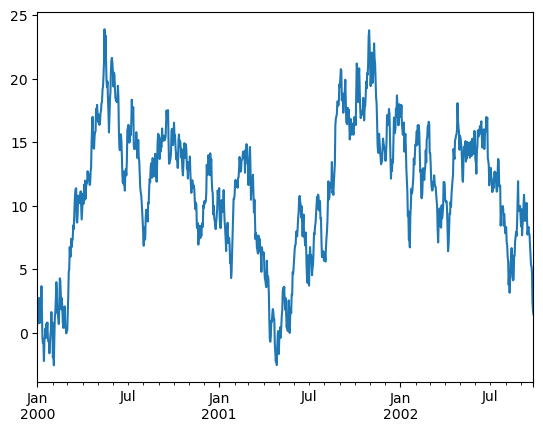

In [305]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [306]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


<Axes: xlabel='Date'>

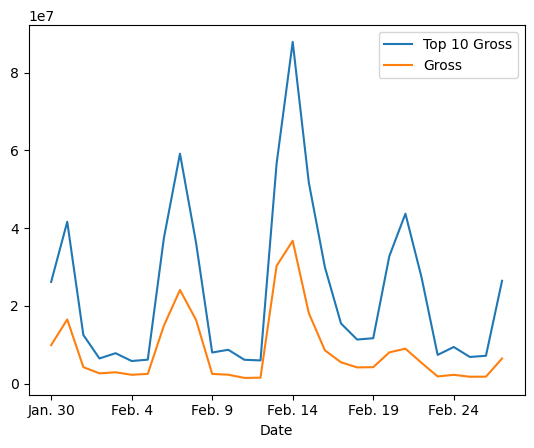

In [307]:
df.plot(x='Date', y=['Top 10 Gross', 'Gross'])

In [308]:
df_iris = get_iris_df()
df_iris.sample(5)

,petalLength,petalWidth,sepalLength,sepalWidth,species
18,1.7,0.3,5.7,3.8,setosa
121,4.9,2.0,5.6,2.8,virginica
88,4.1,1.3,5.6,3.0,versicolor
108,5.8,1.8,6.7,2.5,virginica
92,4.0,1.2,5.8,2.6,versicolor


<Axes: xlabel='petalLength', ylabel='petalWidth'>

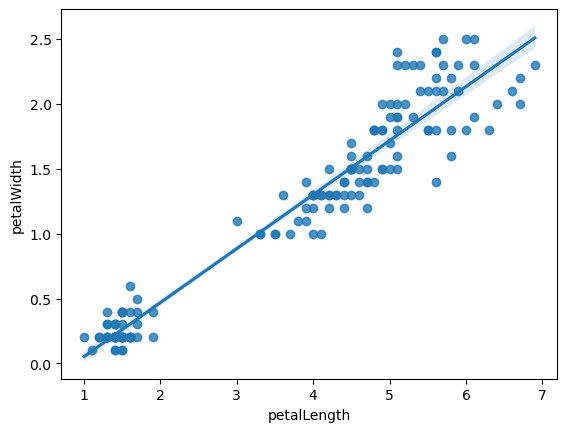

In [309]:
# 线性回归
sns.regplot(x='petalLength', y='petalWidth',data=df_iris)

## 复制数据

复制 Frame 或者 Series 的数据使用 `copy` 方法。

`Signature: df.copy(deep: 'bool_t' = True) -> 'FrameOrSeries'`

参数 `deep` 默认为 `True` 。

In [310]:
df = get_random_df()
df_deep = df.copy()
df_shallow = df.copy(deep=False)
df.iloc[1,1] = 0

In [311]:
df

,A,B,C,D
2020-01-01,-1.071799,0.188923,-0.668379,0.449098
2020-01-02,1.251380,0.000000,-0.572137,1.458622
2020-01-03,-2.022332,-0.550459,-1.274836,-0.582405
2020-01-04,1.141896,-0.142556,-0.251569,1.379481
2020-01-05,-0.739099,0.183947,-0.404191,-0.016017
2020-01-06,-0.006627,0.396511,-0.266546,1.315980


In [312]:
df_deep

,A,B,C,D
2020-01-01,-1.071799,0.188923,-0.668379,0.449098
2020-01-02,1.251380,0.359405,-0.572137,1.458622
2020-01-03,-2.022332,-0.550459,-1.274836,-0.582405
2020-01-04,1.141896,-0.142556,-0.251569,1.379481
2020-01-05,-0.739099,0.183947,-0.404191,-0.016017
2020-01-06,-0.006627,0.396511,-0.266546,1.315980


In [313]:
df_shallow

,A,B,C,D
2020-01-01,-1.071799,0.188923,-0.668379,0.449098
2020-01-02,1.251380,0.000000,-0.572137,1.458622
2020-01-03,-2.022332,-0.550459,-1.274836,-0.582405
2020-01-04,1.141896,-0.142556,-0.251569,1.379481
2020-01-05,-0.739099,0.183947,-0.404191,-0.016017
2020-01-06,-0.006627,0.396511,-0.266546,1.315980


注意：当值为嵌套的结构时，深复制不是递归的。下层原数据变更时也会影响复制后的数据。

In [314]:
s = pd.Series([[1, 2], [3, 4]])
deep = s.copy()
s[0][0] = 10  # 这个会影响复制后的数据
s[1] = [5, 6] # 这个不会影响复制后的数据
s

0    [10, 2]
1     [5, 6]
dtype: object

In [315]:
deep

0    [10, 2]
1     [3, 4]
dtype: object

## 导出数据

### CSV

In [316]:
# 导出周六的数据，格式为 CSV
# df[ (df['Day'] == 'Sat') ].to_csv('test_tmp.csv', mode='w', encoding='utf-8', index=False)

#在前面的文件中追加周日的数据
# df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

### Dict

In [317]:
# 输出为 dict 格式
# DataFrame.to_dict可以接受 ‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [318]:
import pprint
for p in ['dict', 'list', 'series', 'split', 'records', 'index']:
    print(f'Parameters:{p}')
    pprint.pprint(df.to_dict(p))
    print('-----------------------------------------------------')

Parameters:dict
{'AAA': {0: 4, 1: 5, 2: 6, 3: 7},
 'BBB': {0: 10, 1: 20, 2: 30, 3: 40},
 'CCC': {0: 100, 1: 50, 2: -30, 3: -50}}
-----------------------------------------------------
Parameters:list
{'AAA': [4, 5, 6, 7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]}
-----------------------------------------------------
Parameters:series
{'AAA': 0    4
1    5
2    6
3    7
Name: AAA, dtype: int64,
 'BBB': 0    10
1    20
2    30
3    40
Name: BBB, dtype: int64,
 'CCC': 0    100
1     50
2    -30
3    -50
Name: CCC, dtype: int64}
-----------------------------------------------------
Parameters:split
{'columns': ['AAA', 'BBB', 'CCC'],
 'data': [[4, 10, 100], [5, 20, 50], [6, 30, -30], [7, 40, -50]],
 'index': [0, 1, 2, 3]}
-----------------------------------------------------
Parameters:records
[{'AAA': 4, 'BBB': 10, 'CCC': 100},
 {'AAA': 5, 'BBB': 20, 'CCC': 50},
 {'AAA': 6, 'BBB': 30, 'CCC': -30},
 {'AAA': 7, 'BBB': 40, 'CCC': -50}]
-----------------------------------------------

## Cheat Sheet

英文：https://www.dataquest.io/blog/pandas-cheat-sheet/

中文翻译：http://blog.csdn.net/qq_33399185/article/details/60872853

## 相关资源

* pandas 英文最新文档 https://pandas.pydata.org/pandas-docs/stable/pandas.pdf